In [51]:
import json
import os

from flowvisualizer.main import visualize

def load_dataset(path):
    clump_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith('json')]

    print(f'Loading path: {path}')

    all_series = dict()
    for c in clump_files:
        file_path = os.path.join(path, c)
        f = open(file_path)
        contents = json.load(f)
        all_series[c[:-5]] = contents[0][:50]

    return all_series


datasets = [load_dataset(f'./dataset-clumps/padded/{x+1}/') for x in range(10)]

Loading path: ./dataset-clumps/padded/1/
Loading path: ./dataset-clumps/padded/2/
Loading path: ./dataset-clumps/padded/3/
Loading path: ./dataset-clumps/padded/4/
Loading path: ./dataset-clumps/padded/5/
Loading path: ./dataset-clumps/padded/6/
Loading path: ./dataset-clumps/padded/7/
Loading path: ./dataset-clumps/padded/8/
Loading path: ./dataset-clumps/padded/9/
Loading path: ./dataset-clumps/padded/10/


/home/Mohammad/Workspace/InfoLeak/flowvisualizer/main.py:82: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


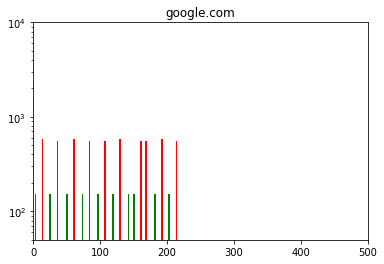

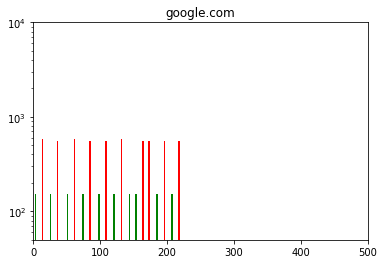

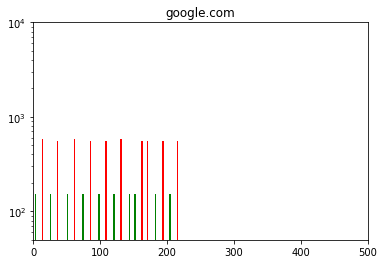

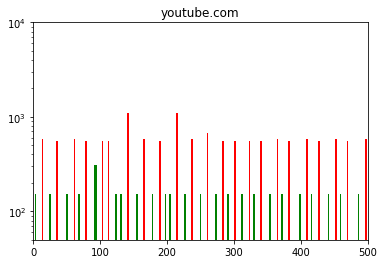

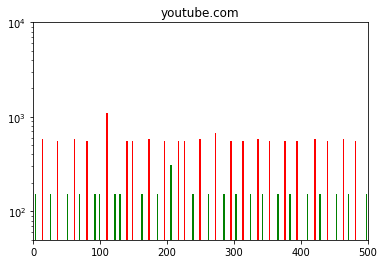

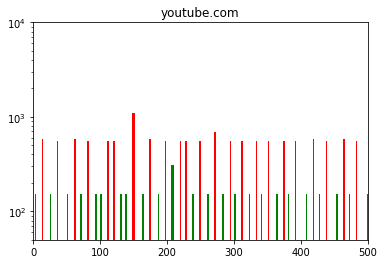

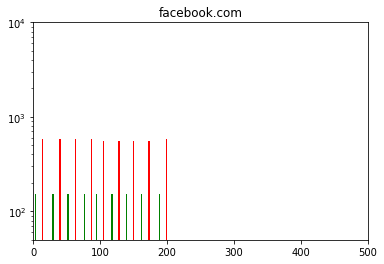

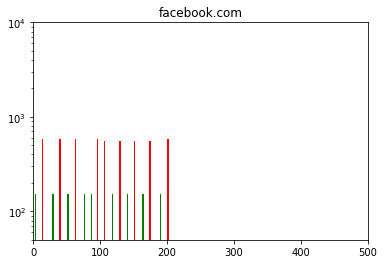

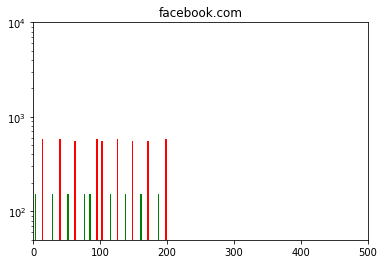

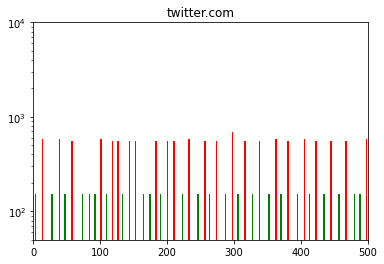

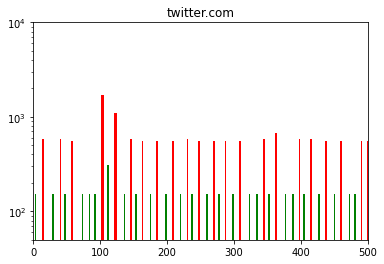

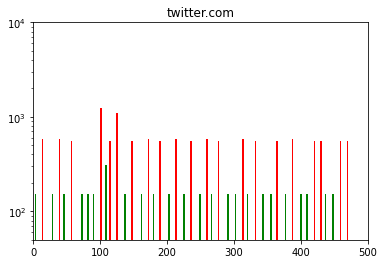

In [52]:
for domain in ['google.com', 'youtube.com', 'facebook.com', 'twitter.com']:
    for i in range(3):
        visualize(domain, datasets[i][domain])

/home/Mohammad/.virtualenvs/InfoLeak/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass memory=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/Mohammad/.virtualenvs/InfoLeak/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


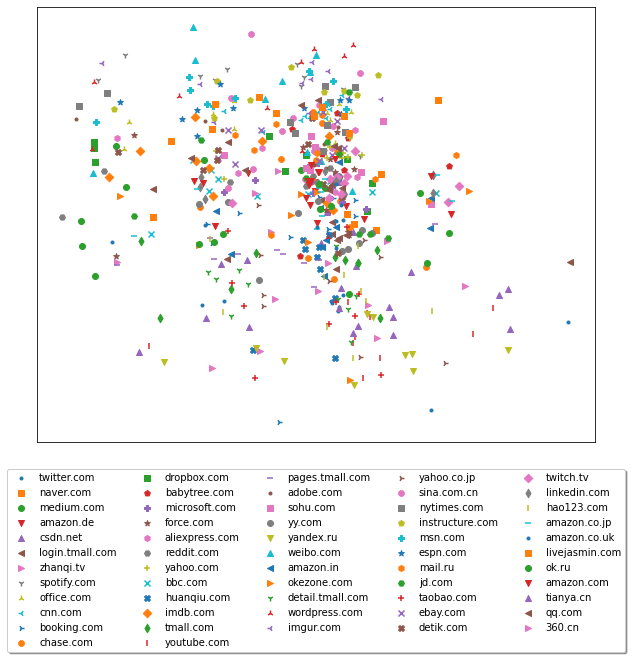

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import seglearn as sgl

ALL_MARKERS = markers=['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']

def plot_embedding(emb, y, y_labels, title):
    # plot a 2D feature map embedding
    x_min, x_max = np.min(emb, 0), np.max(emb, 0)
    emb = (emb - x_min) / (x_max - x_min)

    NC = len(y_labels)
    markers = ALL_MARKERS

    fig = plt.figure()
    fig.set_size_inches(10, 10)

    ax = plt.subplot(111)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.2,
                     box.width, box.height * 0.8])

    for c in range(NC):
        i = y == c
        ax.scatter(emb[i, 0], emb[i, 1], marker=markers[c % len(markers)], label=y_labels[c])

    plt.xticks([]), plt.yticks([])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    fig.savefig(f'./visualized/{uuid.uuid4().hex.upper()[:6]}.png')

from controller.main import read_hosts
TOP_25 = read_hosts('./controller/hosts.csv')[:100]

import uuid

def test_func(width):
    X = []
    y = []
    y_labels = []
    n_labels = 0
    label_to_class = dict()
    
    from copy import deepcopy
    d_copy = deepcopy(datasets)
    
    for dset in d_copy:
        for domain in dset:
            if len(dset[domain]) < width:
                continue
            if domain not in TOP_25 or domain == 'alipay.com':
                continue
            if domain not in y_labels:
                y_labels.append(domain)
                label_to_class[domain] = n_labels
                n_labels += 1

            clumps = dset[domain][:width]

            
            y.append(label_to_class[domain])
            clumps = np.array(clumps)
            
            a =np.delete(clumps, 3, 1)
            b = np.delete(a, 1, 1)
            
            X.append(b)
    
    y = np.array(y)
    # create a pipeline for LDA transformation of the feature representation
    clf = sgl.Pype([('segment', sgl.Segment(width=width)),
                    ('ftr', sgl.FeatureRep()),
                    ('lda', LinearDiscriminantAnalysis(n_components=2))])
    
    X2, y2 = clf.fit_transform(X, y)
    plot_embedding(X2, y2.astype(int), y_labels, f'width={width}')
    plt.show()

test_func(45)

